In [ ]:
#PROBLEMS 1
#1
# Quantum fourier transform(forward) takes input as a signal in the time domain and converts it into one in the frequency domain. 
#For the conversion of the state 0010 to its fourier transform- as it is initially in terms of its computational basis states, the forward(inverse=false) quantum fourier transform has to be applied.
##For the function e^2ix, to get back to a computational basis measurement (i.e., observe the frequency in terms of the qubit states), we need to invert the Fourier Transform, landing back in the time / index domain.
# The inverse QFT takes the phase-encoded state and transforms it into a computational basis state representing the frequency.



Measurement counts: {'0010': 4768, '1110': 4832}


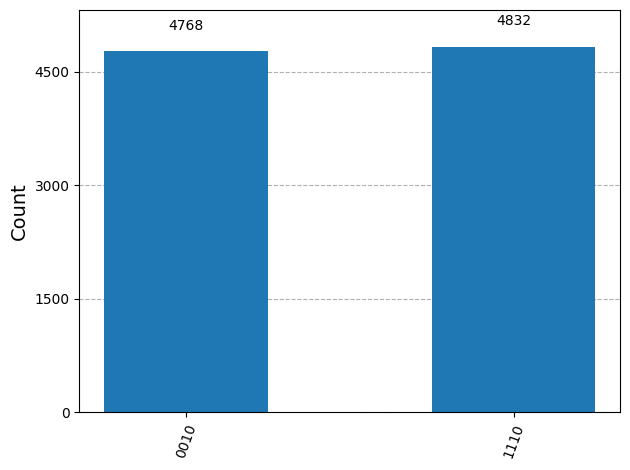

In [ ]:
#sin2x
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit.library import QFT
n_qubits = 4
num_points = 2**n_qubits
x = np.linspace(0, 2*np.pi, num_points, endpoint=False)
func_values = np.exp(1j*2*x)
sin_values = np.imag(func_values)

normalized_values = sin_values / np.linalg.norm(sin_values)
qc_exp = QuantumCircuit(n_qubits)
qc_exp.initialize(normalized_values, range(n_qubits))
qft_circ_inv = QFT(4, inverse=True)
qc_exp.compose(qft_circ_inv, inplace=True)
qc_exp.measure_all()
simulator = AerSimulator()
qc_exp_comp = transpile(qc_exp, simulator)
result = simulator.run(qc_exp_comp, shots=9600).result()
counts = result.get_counts()
print("Measurement counts:", counts)
plot_histogram(counts)
#why is it also peaking at 14(1110)?
# in quantum fourier transform 
# ∣x⟩-> 1/(N)^1/2* ∑ e^(2πikf/N)∣k⟩   (from k=0 to k=N-1)
# sin2x= 1/2i(e^2ix-e^-2ix)
# we get state 2 0010 for e^2ix becoz the function e^2ix rotates its phase by pi/4 in each cycle, which is equal to the rotation per step of the QFT basis state at index 2 (pi/4)(=2pi*f/N)
## So the QFT detects frequency = 2 as the best match.
#Similarly for as frequencies cannot be negative they are wrapped around the number of qubits(mod) 
#for e^-2ix; the function rotates its phase angle by -pi/4 which is equal to what state 14 [1110] rotates in per step.
# one more way it can be seen
# thus there are two frequency components; as e^2ix as shown in the assignment corresponds to the state 2(0010)[2 mod 16] or [freq mod total states];
# similarly e^-2ix corresponds to state -2 mod 16= 14[1110]
# therefore it has almost comparable peaks at both 0010 and 1110

Measurement counts: {'0011': 853, '1100': 1178, '1011': 618, '0010': 160, '0100': 1215, '1101': 862, '1000': 2954, '0101': 597, '0110': 25, '1110': 143, '0001': 45, '0111': 342, '1111': 51, '1001': 367, '0000': 171, '1010': 19}


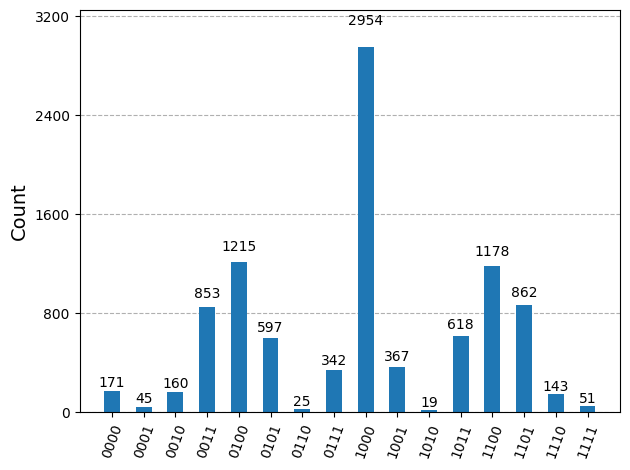

In [ ]:
#sin8x
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit.circuit.library import QFT
n_qubits = 4
num_points = 2**n_qubits
x = np.linspace(0, 2*np.pi, num_points, endpoint=False)
func_values = np.exp(1j*8*x)
sin_values = np.imag(func_values)

normalized_values = sin_values / np.linalg.norm(sin_values)
qc_exp = QuantumCircuit(n_qubits)
qc_exp.initialize(normalized_values, range(n_qubits))
qft_circ_inv = QFT(4, inverse=True)
qc_exp.compose(qft_circ_inv, inplace=True)
qc_exp.measure_all()
simulator = AerSimulator()
qc_exp_comp = transpile(qc_exp, simulator)
result = simulator.run(qc_exp_comp, shots=9600).result()
counts = result.get_counts()
print("Measurement counts:", counts)
plot_histogram(counts)
#why are so many neighbouring peaks also observed(along with state 8)?
## becoz of finite sampling, the DFT does not treat the negative frequency exactly as -e^-8ix at index 8
# for real-valued functions like sin(8x) the DFT interprets index 8 as a purely real oscillation
# also, The DFT cannot distinguish between +8 and -8 for N=16(as N/2 known as Nyquist frequency becoz both are mapped to the same index) . when we feed in sin(8x), the DFT puts all the energy into index 8, because that's where both +8 and −8 components land. 
# even though sine involves subtraction, the DFT interprets the pattern as matching index 8, since sin(8x) is orthogonal to other frequencies but not to index 8 in the discrete world.
# since sin(8x) involves a subtraction of complex exponentials, the overlap of +8 ad -8 components at index 8 creates interference and symmetry issues(the cancellation is imperfect, causing side peaks)
# at the Nyquist limit, the Fourier basis becomes degenerate: the positive and negative frequency components collide into the same vector. This breaks the usual orthogonality conditions, making the DFT unable to separate frequencies cleanly near N/2. The result is spectral leakage and side-lobes even for a pure sin(8x).
# in Fourier transforms (both classical and quantum), the basis functions are ideally orthogonal, meaning each frequency is independent—no overlap or "mixing" between different frequencies.
# but at k=N/2 the phase angle becomes pi (=e^i*pi*x)=(-1)^x which is a purely real. alternating sequence, thus it loses the complex phase rotation behavior that makes the other Fourier basis functions fully orthogonal.
# becoz of this non-orthogonality, the DFT/QFT can't perfectly "lock onto" just the Nyquist frequency. The projection of the signal onto the DFT basis spills into neighboring bins, causing small side peaks (even though we’re using a noiseless simulator).
# Unlike sin(2x), where positive and negative frequencies are mapped to separate indices (2 and 14), at the Nyquist limit this separation vanishes, leading to imperfect cancellation and the appearance of small artificial peaks at neighboring frequencies. This is not due to noise but is related to spectral leakage and aliasing, core limitations of the DFT when representing signals exactly at the sampling rate boundary.

 



In [ ]:
## Amplitude encoding enables exponential data compression by mapping classical data directly onto quantum state amplitudes.
# Efficiently preparing arbitrary amplitude-encoded quantum states typically requires quantum circuits with a number of gates that grows exponentially with the size of the dataset. 
# This results in high circuit depth, which is not suitable for today’s noisy or resource-limited quantum hardware.
# amplitude-encoded states tend to concentrate toward a fixed average state as the dataset grows. This “concentration phenomenon” restricts the discrimination power of quantum classifiers and can actually increase training error as more data are used, resulting in a loss barrier
# Data must be normalized prior to encoding, which presents overhead and possible loss of information.

# ALTERNATIVE MORE EFFICIENT METHOD-QUANTUM RANDOM ACCESS MEMORY
# Unlike classical RAM that accesses one memory cell at a time, QRAM can access an exponential number (2^n) of memory cells simultaneously through superposition(without preparing the state manually)
# In QRAM, the address register (made of qubits) can be placed in a quantum superposition, representing many different addresses at once.
# When a QRAM circuit receives such a superposition as the address input, the memory hardware is designed so that each address in the superposition "queries" its respective memory cell simultaneously.
# The "tree of quantum switches" in bucket-brigade QRAM is a physical and logical scheme for routing quantum information through memory, efficiently mapping quantum superpositions of addresses to the correct memory cells in parallel.
# Binary Tree Structure: The architecture is designed as a binary tree. Each node in the tree is a quantum switch (often a qutrit—a quantum device with three levels: "wait," "0," and "1" states) rather than a standard qubit.
# Routing by Address Qubits: The address register, holding address qubits, is sent through the tree one-by-one. Each address qubit, depending on whether it’s in state "0" or "1," guides the traversal left or right through the tree, setting the quantum switches along the path accordingly.
# Wait State and Path Creation: Initially, all switches are in the "wait" state. As each address qubit (or a superposition thereof) passes through, a path is created from the root down to a specific memory cell. If an address qubit is in a superposition, quantum parallelism naturally activates multiple paths—enabling every address in a superposition to be routed at once
# If the address register is a superposition (e.g., α∣00⟩+β∣01⟩), the switches will route signals down all paths corresponding to each address, simultaneously activating multiple routes through the tree.
# As a result, the QRAM can read or write data from/to all addressed memory cells in one quantum operation, generating a final quantum state that entangles the address with its data:α∣00⟩∣X(00)⟩+β∣01⟩∣X(01)⟩

In [ ]:
import base64
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.circuit.library import QFT

with open("theta.txt", "r") as f:
    encoded_theta = f.read()

theta = float(base64.b64decode(encoded_theta).decode())
print("Decoded θ =", theta)


n_count = 3                  
qc = QuantumCircuit(n_count + 1, n_count)  

qc.x(n_count)


for q in range(n_count):
    qc.h(q)


for q in range(n_count):
    power = 2 ** q
    phase_angle = (2 * np.pi * theta * power) / 4  
    qc.cp(phase_angle, q, n_count)


qc.append(QFT(n_count, inverse=True), range(n_count))
qc.measure(range(n_count), range(n_count))

simulator = AerSimulator()
qc_exp_comp = transpile(qc, simulator)
result = simulator.run(qc_exp_comp, shots=9600).result()
counts = result.get_counts()


measured_bin = max(counts, key=counts.get)
phase = int(measured_bin, 2) / (2 ** n_count)
theta_estimate = 4 * phase  

print("\nQPE Result Counts:", counts)
print("Most probable measured value:", measured_bin)
print("Estimated phase (φ):", phase)
print("Estimated θ (4 × φ):", theta_estimate)
print("True θ:", theta)

# We know θ is less than 4, so to avoid the mod 1 wrap around, we scale it accordingly into [0,1). This lets us use QPE to estimate φ safely, and we can recover θ by:
# θ=4×ϕ
# we explain this in a markdown cell so the reasoning is clear and documented alongside the code.

Decoded θ = 2.75

QPE Result Counts: {'100': 498, '110': 3946, '101': 3899, '000': 239, '111': 475, '001': 167, '011': 219, '010': 157}
Most probable measured value: 110
Estimated phase (φ): 0.75
Estimated θ (4 × φ): 3.0
True θ: 2.75


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
import pandas as pd
from fractions import Fraction

N = 15
a = 7
n_control = 4 

def c_amod15(a, power):
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")  # Co-prime to 15
    U = QuantumCircuit(4)
    for _ in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4,11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    return U.control()

qc_shor = QuantumCircuit(n_control + 4, n_control)

for q in range(n_control):
    qc_shor.h(q)

qc_shor.x(n_control + 3)

for q in range(n_control):
    qc_shor.append(c_amod15(a, 2**q), [q] + [i + n_control for i in range(4)])


qc_shor.append(QFT(n_control, inverse=True), range(n_control))

qc_shor.measure(range(n_control), range(n_control))

simulator = AerSimulator()
qc_exp_comp = transpile(qc, simulator)
result = simulator.run(qc_exp_comp, shots=1024).result()
counts = result.get_counts()


rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)
    phase = decimal / (2**n_control)
    measured_phases.append(phase)
    rows.append([f"{output} (bin) = {decimal} (dec)", f"{decimal}/16 = {phase:.2f}"])

print("\nMeasured Phases:")
df1 = pd.DataFrame(rows, columns=["Register Output", "Phase"])
print(df1)


rows, candidate_r = [], []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(N)
    candidate_r.append(frac.denominator)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])

print("\nPhase to Period Conversion:")
df2 = pd.DataFrame(rows, columns=["Phase", "Fraction", "Guess for r"])
print(df2)

print("\nFactoring N=15:")
factors_found = set()
for r in candidate_r:
    if r % 2 == 0:
        factor1 = np.gcd(a ** (r // 2) - 1, N)
        factor2 = np.gcd(a ** (r // 2) + 1, N)
        for factor in [factor1, factor2]:
            if factor not in [1, N]:
                factors_found.add(factor)
                print(f"Found factor: {factor}")
    else:
        print(f"r={r} is odd, trying other samples...")

p, q = sorted(factors_found)
print(f"\nFinal factors: p={p}, q={q}")

phi_N = (p - 1) * (q - 1)
e = 7
d = pow(e, -1, int(phi_N))
print(f"Private key d = {d}")

ciphertext = [14, 9, 12, 5]
plaintext_numbers = [pow(c, d, N) for c in ciphertext]

# Map back to letters A=1, ..., N=14
num_to_letter = {i: chr(64 + i) for i in range(1, 15)}
plaintext = ''.join([num_to_letter[num] for num in plaintext_numbers])

print(f"Decrypted numbers: {plaintext_numbers}")
print(f"Decrypted word: {plaintext}")



Measured Phases:
       Register Output        Phase
0  110 (bin) = 6 (dec)  6/16 = 0.38
1  101 (bin) = 5 (dec)  5/16 = 0.31
2  100 (bin) = 4 (dec)  4/16 = 0.25
3  111 (bin) = 7 (dec)  7/16 = 0.44
4  010 (bin) = 2 (dec)  2/16 = 0.12
5  011 (bin) = 3 (dec)  3/16 = 0.19
6  000 (bin) = 0 (dec)  0/16 = 0.00
7  001 (bin) = 1 (dec)  1/16 = 0.06

Phase to Period Conversion:
    Phase Fraction  Guess for r
0  0.3750      3/8            8
1  0.3125     4/13           13
2  0.2500      1/4            4
3  0.4375      4/9            9
4  0.1250      1/8            8
5  0.1875     2/11           11
6  0.0000      0/1            1
7  0.0625     1/15           15

Factoring N=15:
r=13 is odd, trying other samples...
Found factor: 3
Found factor: 5
r=9 is odd, trying other samples...
r=11 is odd, trying other samples...
r=1 is odd, trying other samples...
r=15 is odd, trying other samples...

Final factors: p=3, q=5
Private key d = 7
Decrypted numbers: [14, 9, 3, 5]
Decrypted word: NICE
